In [1]:
import os
import json
import_ time
from datetime import date, datetime, timedelta
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
from libsstock import (
    loadStocks, computeIchimoku, checkVar, graphEvolutionTitre,
    graphIchimoku, graphBestGain, graphWorseGain, graphCashLock, graphRendement,
    graphEvolutionIntraday
)
from plotly_tools import genIMGfromFile
import telepot
from updateDB import updateDB, getStockData, getStockIntradayData, getStockName, HandleDB

def displayGraphValues(mybot, chat_id, msg):
    df = loadStocks('mystocks.json')
    genIMGfromFile(graphRendement(df), 'img.png', scale=1.3, width=800, height=500)
    mybot.sendPhoto(chat_id, open('img.png', 'rb'))

def sendVarIf(mybot, chat_id, msg):
    sendVarIfJson(mybot, chat_id, 'mystocks.json')
def sendVarIfprospects(mybot, chat_id, msg):
    sendVarIfJson(mybot, chat_id, 'stockprospects.json')

def sendVarIfprospectsALL(mybot, chat_id, msg):
    sendVarIfJsonALL(mybot, chat_id, 'stockprospects.json')

def sendVarIfJson(mybot, chat_id, fileJson):
    (strOut, dfData) = checkVar(loadStocks(fileJson), 1, which='pos')
    (strOut2, dfData) = checkVar(loadStocks(fileJson), 1, which='neg')
    if len(strOut + strOut2) > 0:
        mybot.sendMessage(
            chat_id, strOut + strOut2
        )

        
def sendVarIfJsonALL(mybot, chat_id, fileJson):
    (strOut, dfData) = checkVar(loadStocks(fileJson), 1, which='all')
    if len(strOut) > 0:
        mybot.sendMessage(
            chat_id, strOut
        )

        
        
def genIntraday(mybot, chat_id, msg):
    # recall for generate graph over a year
    #pdb.set_trace()
    stockName = msg["text"].replace('/stockinfo','').replace('_', '.')
    print('Generate data for ' + stockName)
    mybot.sendMessage(
        chat_id, 'Generate data for ' + stockName
    )
    
    data=genIMGfromFile(graphEvolutionIntraday(stockName), 'img.png', scale=1.3, width=800, height=500)
    mybot.sendPhoto(chat_id, open('img.png', 'rb'))


def genDataFromStock(mybot, chat_id, msg):
    # recall for generate graph over a year
    #pdb.set_trace()
    stockName = msg["text"].replace('/stockinfo','').replace('_', '.')
    print('Generate data for ' + stockName)
    mybot.sendMessage(
        chat_id, 'Generate data for ' + stockName
    )
    
    dfData = loadStocks('stockprospects.json')
    dfData = dfData.loc[dfData['stockname'] == stockName]
    histoData = getStockData(stockName)
    data=genIMGfromFile(graphEvolutionTitre(histoData, dfData.iloc[0]), 'img.png', scale=1.3, width=800, height=500)
    mybot.sendPhoto(chat_id, open('img.png', 'rb'))
    histo = computeIchimoku(histoData)
    startDate=date.today() - timedelta(days=60)
    data=genIMGfromFile(graphIchimoku(
        dfData, histo[histo.index > startDate]
    ), 'img.png', scale=1.3, width=800, height=500)
    mybot.sendPhoto(chat_id, open('img.png', 'rb'))
    startDate=date.today() - timedelta(days=360)
    data=genIMGfromFile(graphIchimoku(
        dfData, histo[histo.index > startDate]
    ), 'img.png', scale=1.3, width=800, height=500)
    mybot.sendPhoto(chat_id, open('img.png', 'rb'))


def listMenuItems(mybot, chat_id, msg):
    mybot.sendMessage(
        chat_id, '''
        Commandes possibles :\n
        ''' + '\n'.join(['- /' + key + ' : ' + value['details'] for key, value in availableCommands.items()])
    )

availableCommands = {
    'menu': {'fct': listMenuItems, 'details': 'Affiche les commandes disponibles.'},
    'gainetpertes': {'fct': displayGraphValues, 'details': 'Répartition des pertes et gain par actions.'},
    'varportefeuille': {'fct': sendVarIf, 'details': 'Visualiser les variations sur les valeurs.'},
    'varprospects': {'fct': sendVarIfprospectsALL, 'details': 'Visualiser les variations sur les valeurs en prospects.'},
    'stockinfo': {'fct': genDataFromStock, 'details': 'Visualiser les variations sur les valeurs en prospects.'},
    'stockintraday': {'fct': genIntraday, 'details': 'Visualiser les variations sur les valeurs en prospects.'},
}

def handle(msg):
    #try:
        global mybot
        content_type, chat_type, chat_id = telepot.glance(msg)
        msgDecoded = False

        if content_type == 'text':
            for cmd, value in availableCommands.items():
                if '/' + cmd in msg["text"]:
                    msgDecoded = True
                    value['fct'](mybot, chat_id, msg)
        if not msgDecoded:
            mybot.sendMessage(chat_id, "Message '{}' non géré, essayez /menu.".format(msg["text"]))
    #except Exception as e: 
    #    print(e)
    #    mybot.sendMessage(chat_id, "Error : \n" + str(e))


def main():
    global mybot
    bot_token = '***REMOVED***'
    bot_chatID = '***REMOVED***'
    mybot = telepot.Bot(bot_token)
    mybot.message_loop(handle)
    mybot.sendMessage(
        bot_chatID, '''
        Bonjour, bienvenue sur le bot financier, essayer /menu pour les fonctions.
        '''
    )
    while(1):
        updateDB()
        try:
            thisHourSend = datetime.today().hour
            if (datetime.today().weekday() in [0, 1, 2, 3, 4] and datetime.today().hour + 2 >= 9 and datetime.today().hour + 2 <= 18):
                sendVarIf(mybot, bot_chatID, None)
                #sendVarIfprospects(mybot, bot_chatID, None)
        except:
            pass
        print('Sleeping 5 minutes')
        time.sleep(60 * 5)


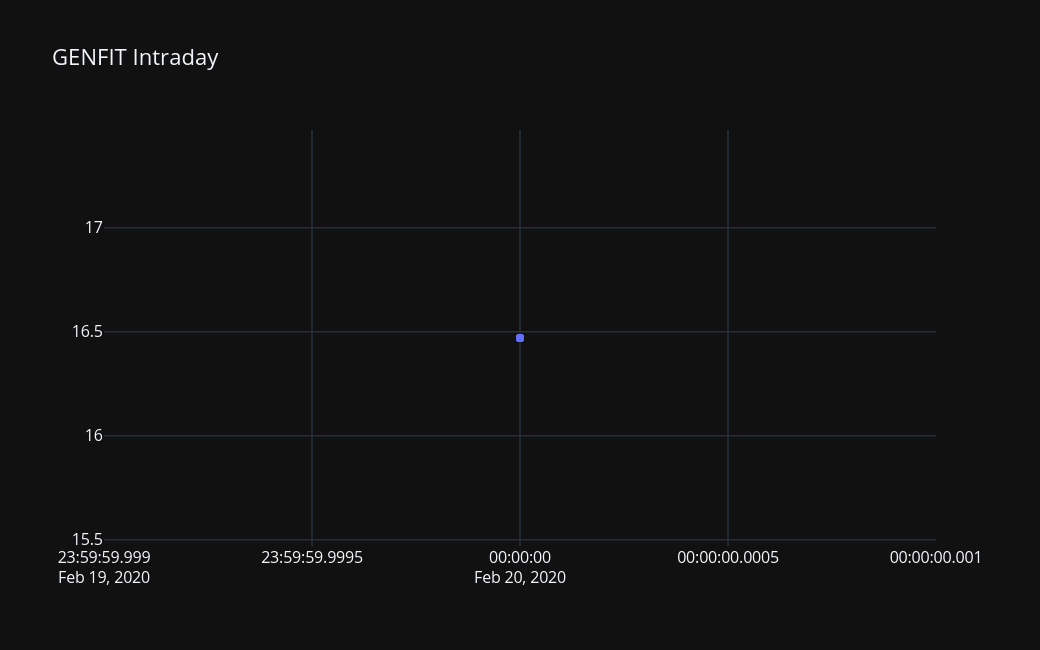

In [3]:

from plotly_tools import genIMGfromFile
from IPython.display import Image as ImageD
# recall for generate graph over a year
#pdb.set_trace()
stockName = 'GNFT.PA'
data=genIMGfromFile(graphEvolutionIntraday(stockName), 'img.png', scale=1.3, width=800, height=500)

display(ImageD(data=data))